# Mushroom
http://archive.ics.uci.edu/ml/datasets/Mushroom
- 8124 종류의 버섯의 특징과 독의 유무를 정리한 데이터셋
- 버섯 모양의 특징을 기반으로 독의 유무를 판단
---
한 줄(row)이 버섯 한 종류<br>
1번째 컬럼은 독의 유무 : 독(p), 식용(e)<br>
2번째 컬럼은 버섯의 머리모양 : 종모양(b), 원뿔(c), 볼록(x), 평평(f), 혹(k), 오목(s)<br>
4번째 컬럼은 버섯의 머리색 : 갈색(n), 황갈색(b), 연한갈색(c), 회색(g), ... 총 10개<br>

* 자세한 내용은 위의 사이트에서 확인

In [ ]:
### Mushroom 데이터의 특징
- 모두 factor이다
- target 값 정렬이 안되어있다(1열)
- 숫자가 수치가 아닌 index의 개념(구분하기 위한 값) > 범주형 데이터로 변환해야 한다(행렬)
- target 값의 범주별 빈도가 다르다 > 6:4 비율 정도면 그냥 써도 괜찮다
- 총 데이터 수가 10만건 이상 되어야 머신러닝할만 하다

In [13]:
# 인공신경망, 의사결정나무, RandomForest, SVM, 로지스틱 회귀분석
library(nnet)
library(party)
library(randomForest)
library(e1071)
library(caret)
library(dplyr)


Attaching package: ‘dplyr’

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [14]:
options(warn=-1)
mushroom <- read.csv("../Data/mushroom.csv",header=F)
head(mushroom)
table(mushroom[,1])
table(mushroom[,2])
table(mushroom[,4])
str(mushroom) # 전부다 factor이다.
mushroom <- arrange(mushroom,V1)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g



   e    p 
4208 3916 


   b    c    f    k    s    x 
 452    4 3152  828   32 3656 


   b    c    e    g    n    p    r    u    w    y 
 168   44 1500 1840 2284  144   16   16 1040 1072 

'data.frame':	8124 obs. of  23 variables:
 $ V1 : Factor w/ 2 levels "e","p": 2 1 1 2 1 1 1 1 2 1 ...
 $ V2 : Factor w/ 6 levels "b","c","f","k",..: 6 6 1 6 6 6 1 1 6 1 ...
 $ V3 : Factor w/ 4 levels "f","g","s","y": 3 3 3 4 3 4 3 4 4 3 ...
 $ V4 : Factor w/ 10 levels "b","c","e","g",..: 5 10 9 9 4 10 9 9 9 10 ...
 $ V5 : Factor w/ 2 levels "f","t": 2 2 2 2 1 2 2 2 2 2 ...
 $ V6 : Factor w/ 9 levels "a","c","f","l",..: 7 1 4 7 6 1 1 4 7 1 ...
 $ V7 : Factor w/ 2 levels "a","f": 2 2 2 2 2 2 2 2 2 2 ...
 $ V8 : Factor w/ 2 levels "c","w": 1 1 1 1 2 1 1 1 1 1 ...
 $ V9 : Factor w/ 2 levels "b","n": 2 1 1 2 1 1 1 1 2 1 ...
 $ V10: Factor w/ 12 levels "b","e","g","h",..: 5 5 6 6 5 6 3 6 8 3 ...
 $ V11: Factor w/ 2 levels "e","t": 1 1 1 1 2 1 1 1 1 1 ...
 $ V12: Factor w/ 5 levels "?","b","c","e",..: 4 3 3 4 4 3 3 3 4 3 ...
 $ V13: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V14: Factor w/ 4 levels "f","k","s","y": 3 3 3 3 3 3 3 3 3 3 ...
 $ V15: Factor w/ 9 levels "b","c"

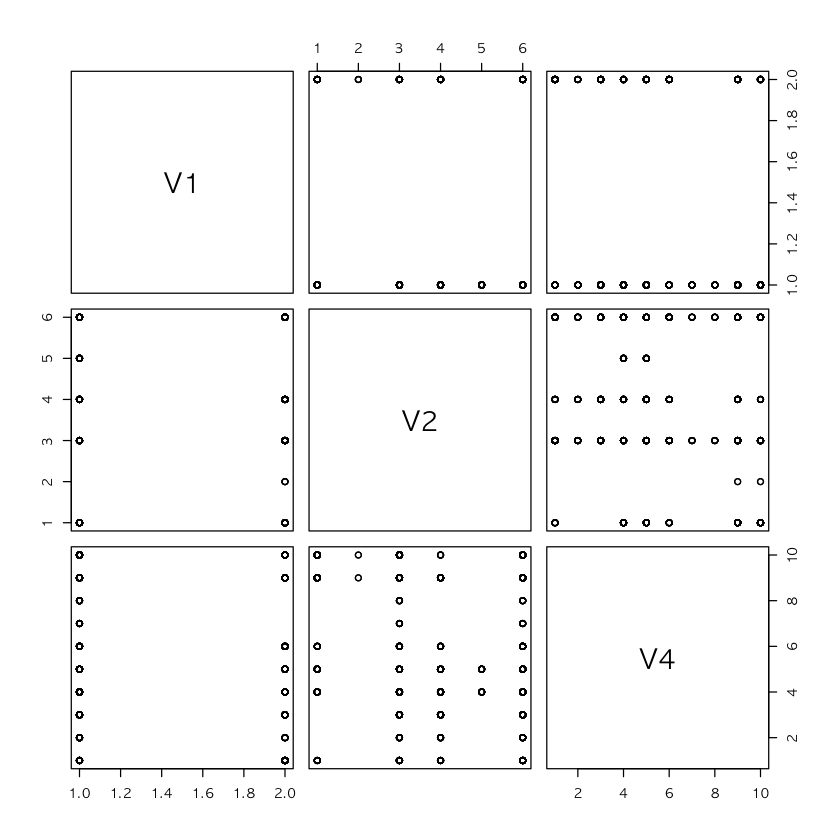

In [3]:
par(family="AppleGothic")
plot(mushroom[,c(1,2,4)])

In [4]:
for(i in 1:ncol(mushroom)){
  mushroom[,i] <- as.numeric(mushroom[,i])
}
str(mushroom)

'data.frame':	8124 obs. of  23 variables:
 $ V1 : num  2 1 1 2 1 1 1 1 2 1 ...
 $ V2 : num  6 6 1 6 6 6 1 1 6 1 ...
 $ V3 : num  3 3 3 4 3 4 3 4 4 3 ...
 $ V4 : num  5 10 9 9 4 10 9 9 9 10 ...
 $ V5 : num  2 2 2 2 1 2 2 2 2 2 ...
 $ V6 : num  7 1 4 7 6 1 1 4 7 1 ...
 $ V7 : num  2 2 2 2 2 2 2 2 2 2 ...
 $ V8 : num  1 1 1 1 2 1 1 1 1 1 ...
 $ V9 : num  2 1 1 2 1 1 1 1 2 1 ...
 $ V10: num  5 5 6 6 5 6 3 6 8 3 ...
 $ V11: num  1 1 1 1 2 1 1 1 1 1 ...
 $ V12: num  4 3 3 4 4 3 3 3 4 3 ...
 $ V13: num  3 3 3 3 3 3 3 3 3 3 ...
 $ V14: num  3 3 3 3 3 3 3 3 3 3 ...
 $ V15: num  8 8 8 8 8 8 8 8 8 8 ...
 $ V16: num  8 8 8 8 8 8 8 8 8 8 ...
 $ V17: num  1 1 1 1 1 1 1 1 1 1 ...
 $ V18: num  3 3 3 3 3 3 3 3 3 3 ...
 $ V19: num  2 2 2 2 2 2 2 2 2 2 ...
 $ V20: num  5 5 5 5 1 5 5 5 5 5 ...
 $ V21: num  3 4 4 3 4 3 3 4 3 3 ...
 $ V22: num  4 3 3 4 1 3 3 4 5 4 ...
 $ V23: num  6 2 4 6 2 2 4 4 2 4 ...


In [5]:
summary(mushroom[,17])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

In [12]:
# Sampling, 학습용/검증용 만들기
mushroom1 <- as.data.frame(scale(mushroom[,1:16])) # 1~16 먼저 집어넣기
mushroom1$V17 <- 0 # 17 열 0으로 채우기
mushroom1[,18:ncol(mushroom)] <- as.data.frame(scale(mushroom[,18:ncol(mushroom)])) # 18~ 끝까지 집어넣기
head(mushroom1)

samp <- createDataPartition(mushroom1[,1], p=0.7, list=F)
# 학습용
data.tr <- mushroom1[samp,]
data.tr2 <- mushroom[samp,]
# 검증용
data.test <- mushroom1[-samp,]
data.test2 <- mushroom[-samp,]

# 문제 및 정답 만들기
x <- subset(data.test, select=-V1)
y <- data.test$V1
x2 <- subset(data.test2, select=-V1)
y2 <- data.test2$V1

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
1.0365489,1.029649,0.1401193,-0.1982376,1.1858436,0.8818834,0.1628864,-0.4388366,1.4945907,-0.22898367,...,0.5863486,0.6224031,0.6319525,0,0.1420279,-0.256116,0.9480225,-0.6701536,-0.5143575,2.0299031
-0.9646211,1.029649,0.1401193,1.7657654,1.1858436,-1.9701949,0.1628864,-0.4388366,-0.6689971,-0.22898367,...,0.5863486,0.6224031,0.6319525,0,0.1420279,-0.256116,0.9480225,-0.2504552,-1.3130274,-0.2957115
-0.9646211,-2.086919,0.1401193,1.3729648,1.1858436,-0.5441558,0.1628864,-0.4388366,-0.6689971,0.05347356,...,0.5863486,0.6224031,0.6319525,0,0.1420279,-0.256116,0.9480225,-0.2504552,-1.3130274,0.8670958
1.0365489,1.029649,0.9532117,1.3729648,1.1858436,0.8818834,0.1628864,-0.4388366,1.4945907,0.05347356,...,0.5863486,0.6224031,0.6319525,0,0.1420279,-0.256116,0.9480225,-0.6701536,-0.5143575,2.0299031
-0.9646211,1.029649,0.1401193,-0.5910382,-0.8431777,0.4065370,0.1628864,2.2784719,-0.6689971,-0.22898367,...,0.5863486,0.6224031,0.6319525,0,0.1420279,-0.256116,-1.2721374,-0.2504552,-2.9103671,-0.2957115
-0.9646211,1.029649,0.9532117,1.7657654,1.1858436,-1.9701949,0.1628864,-0.4388366,-0.6689971,0.05347356,...,0.5863486,0.6224031,0.6319525,0,0.1420279,-0.256116,0.9480225,-0.6701536,-1.3130274,-0.2957115


In [9]:
result = 0
# 인공신경망
nnetF <- function(q){
  result = 0
  for(i in 1:q){
    # 학습하기
    model.nnet <- nnet(V1~.,data=data.tr,size=2) 

    # 검증하기
    pred <- predict(model.nnet, x)

    # 예측율  
    result = (result + mean(pred == y))
  }
  return(result/q)
}

# 의사결정나무
ctreeF <- function(q){
  result = 0
  for(i in 1:q){
  # 학습하기
  model.ctree <- ctree(V1~.,data=data.tr2)

  # 검증하기
  pred2 <- predict(model.ctree, x2)

  # 예측율
  result <- (result + mean(pred2 == y2))
  }
  return(result/q)
}

# Random Forest
rfF <- function(q){  
  result = 0
  for(i in 1:q){
  # 학습하기
  model.rf <- randomForest(V1~., data=data.tr2, ntree=100)

  # 검증하기
  pred2 <- predict(model.rf, x2)

  # 예측율  
  result <- (result + mean(pred2 == y2))
  }
  return(result/q)
}

# SVM
svmF <- function(q){  
  result = 0
  for(i in 1:q){
  # 학습하기
  model.svm = svm(V1~., data=data.tr2)

  # 검증하기
  pred2 <- predict(model.svm, x2)

  # 예측율
  result <- (result + mean(pred2 == y2))
  }
  return(result/q)
}

# 다항 로지스틱 회귀분석
mulF <- function(q){  
  result = 0
  for(i in 1:q){
  # 학습하기
  model.mul <- multinom(V1~., data=data.tr,type='class')

  # 검증하기
  pred <- predict(model.mul, x)

  # 예측율  
  result <- (result + mean(pred == y))
  }
  return(result/q)
}


In [10]:
nnetF(10)

# weights:  49
initial  value 6956.088603 
final  value 5685.537612 
converged
# weights:  49
initial  value 6436.434593 
final  value 5685.537612 
converged
# weights:  49
initial  value 6735.262862 
final  value 5685.537612 
converged
# weights:  49
initial  value 5949.556554 
final  value 5685.537612 
converged
# weights:  49
initial  value 8345.529777 
final  value 5685.537612 
converged
# weights:  49
initial  value 6357.090531 
final  value 5685.537612 
converged
# weights:  49
initial  value 6737.105221 
final  value 5685.537612 
converged
# weights:  49
initial  value 6342.768395 
final  value 5685.537612 
converged
# weights:  49
initial  value 6375.992004 
final  value 5685.537612 
converged
# weights:  49
initial  value 7286.332482 
final  value 5685.537612 
converged


[1] 0

In [11]:
final <- data.frame(예측력=c(nnetF(10),ctreeF(10),rfF(10),svmF(10),mulF(10)))
rownames(final) <- c('인공신경망','의사결정나무','RandomForest','SVM','로지스틱회귀분석')
final

# weights:  49
initial  value 6531.978560 
final  value 5685.537612 
converged
# weights:  49
initial  value 7450.440633 
final  value 5685.537612 
converged
# weights:  49
initial  value 6530.295890 
final  value 5685.537612 
converged
# weights:  49
initial  value 8376.506499 
final  value 5685.537612 
converged
# weights:  49
initial  value 6470.723436 
final  value 5685.537612 
converged
# weights:  49
initial  value 7992.625834 
final  value 5685.537612 
converged
# weights:  49
initial  value 6395.610813 
final  value 5685.537612 
converged
# weights:  49
initial  value 7353.715167 
final  value 5685.537612 
converged
# weights:  49
initial  value 6864.814817 
final  value 5685.537612 
converged
# weights:  49
initial  value 6725.455385 
final  value 5685.537612 
converged
# weights:  24 (23 variable)
initial  value 3941.928016 
iter  10 value 2554.215873
iter  20 value 1367.838497
iter  30 value 817.379983
iter  40 value 717.830976
iter  50 value 700.478854
iter  60 value 699.66

,예측력
인공신경망,0.00000000
의사결정나무,0.99794830
RandomForest,0.00151826
SVM,0.00000000
로지스틱회귀분석,0.95773492
